In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

columns = ['Status', 'Duration', 'CreditHistory', 'Purpose', 'CreditAmount', 'Savings', 'EmploymentSince',
           'InstallmentRate', 'PersonalStatusSex', 'Debtors', 'ResidenceSince', 'Property', 'Age',
           'OtherInstallmentPlans', 'Housing', 'NumberCredits', 'Job', 'PeopleLiable', 'Telephone', 'ForeignWorker', 'Target']

df = pd.read_csv('./german.data', sep=' ', header=None, names=columns)
df

,Status,Duration,CreditHistory,Purpose,CreditAmount,Savings,EmploymentSince,InstallmentRate,PersonalStatusSex,Debtors,...,Property,Age,OtherInstallmentPlans,Housing,NumberCredits,Job,PeopleLiable,Telephone,ForeignWorker,Target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [3]:
df.shape 

(1000, 21)

In [4]:
df[df.duplicated()]

,Status,Duration,CreditHistory,Purpose,CreditAmount,Savings,EmploymentSince,InstallmentRate,PersonalStatusSex,Debtors,...,Property,Age,OtherInstallmentPlans,Housing,NumberCredits,Job,PeopleLiable,Telephone,ForeignWorker,Target


In [5]:
df.isnull().sum()

Status                   0
Duration                 0
CreditHistory            0
Purpose                  0
CreditAmount             0
Savings                  0
EmploymentSince          0
InstallmentRate          0
PersonalStatusSex        0
Debtors                  0
ResidenceSince           0
Property                 0
Age                      0
OtherInstallmentPlans    0
Housing                  0
NumberCredits            0
Job                      0
PeopleLiable             0
Telephone                0
ForeignWorker            0
Target                   0
dtype: int64

In [6]:
df.describe()

,Duration,CreditAmount,InstallmentRate,ResidenceSince,Age,NumberCredits,PeopleLiable,Target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [19]:
categorical_cols = ['Status', 'CreditHistory', 'Purpose', 'Savings', 'EmploymentSince', 'PersonalStatusSex', 'Debtors',
            'Property', 'OtherInstallmentPlans', 'Housing', 'Job','Telephone','ForeignWorker']

numeric_cols = ['Duration','CreditAmount','InstallmentRate','ResidenceSince','Age','NumberCredits','PeopleLiable']

In [13]:
def plot_categorical_dual(df, target_col='Target'):

    for col in categorical_cols:
        plt.figure(figsize=(12, 4))

        # Raw distribution
        plt.subplot(1, 2, 1)
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f"{col}: Overall Distribution")
        plt.xticks(rotation=45)

        # Distribution by target class
        plt.subplot(1, 2, 2)
        sns.countplot(data=df, x=col, hue=target_col, order=df[col].value_counts().index)
        plt.title(f"{col}: Distribution by {target_col}")
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

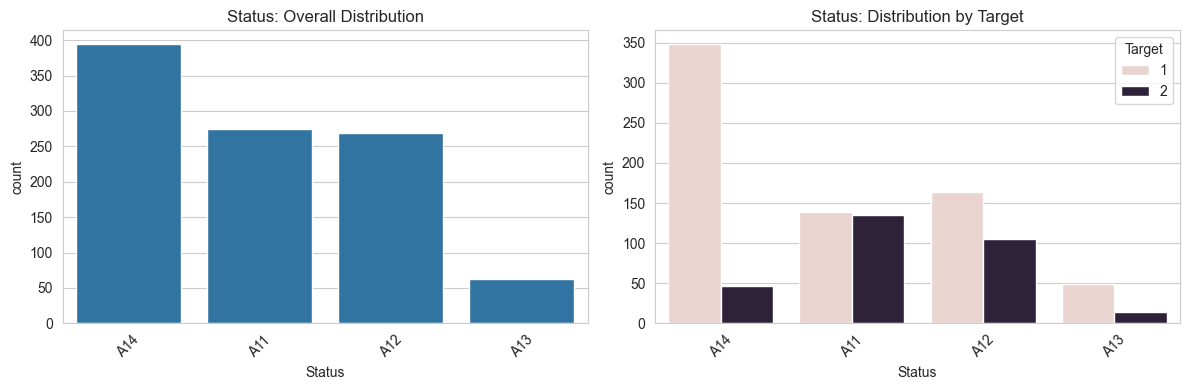

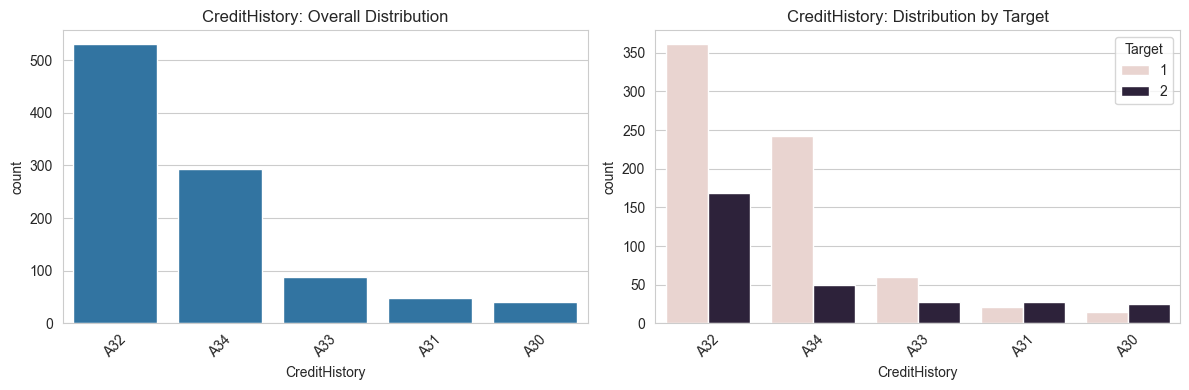

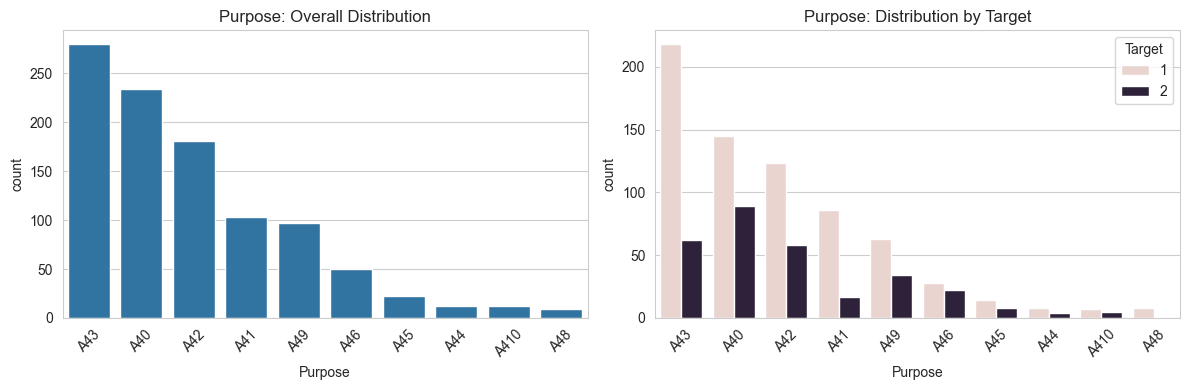

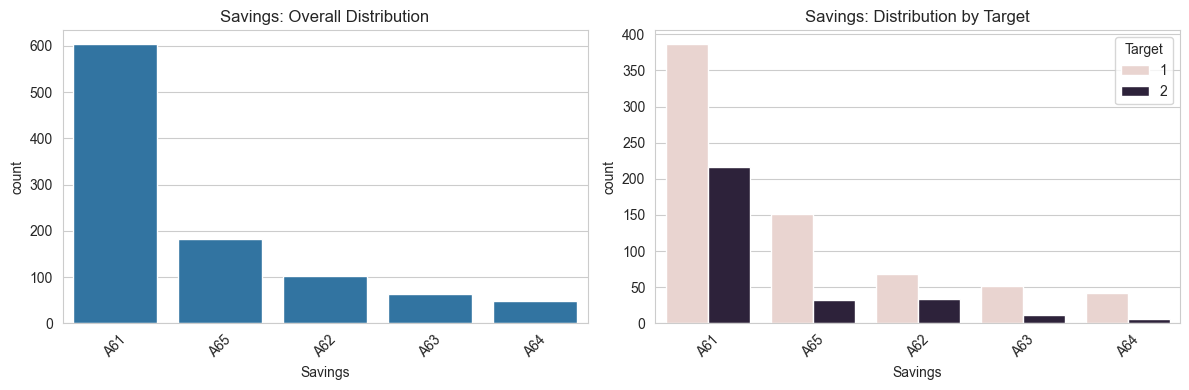

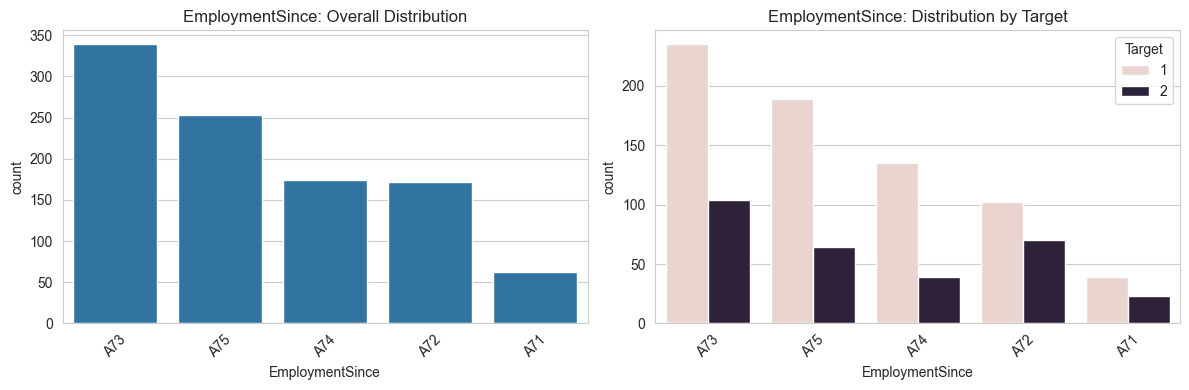

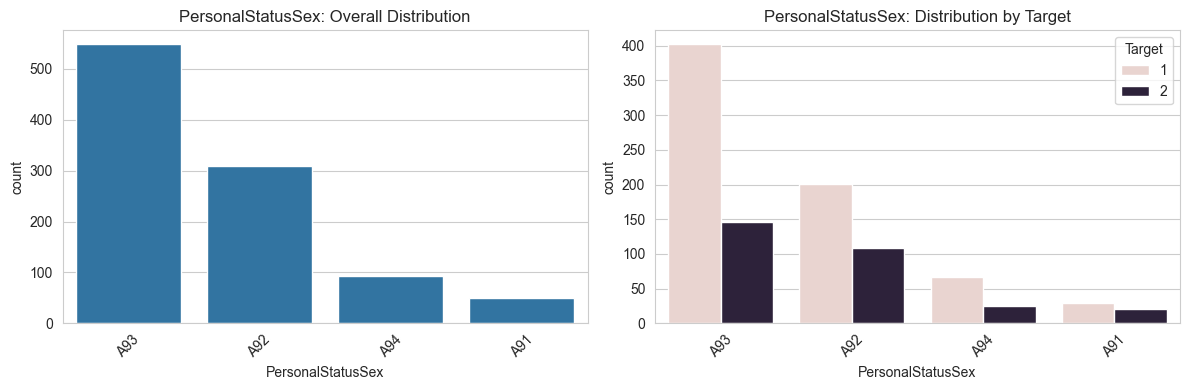

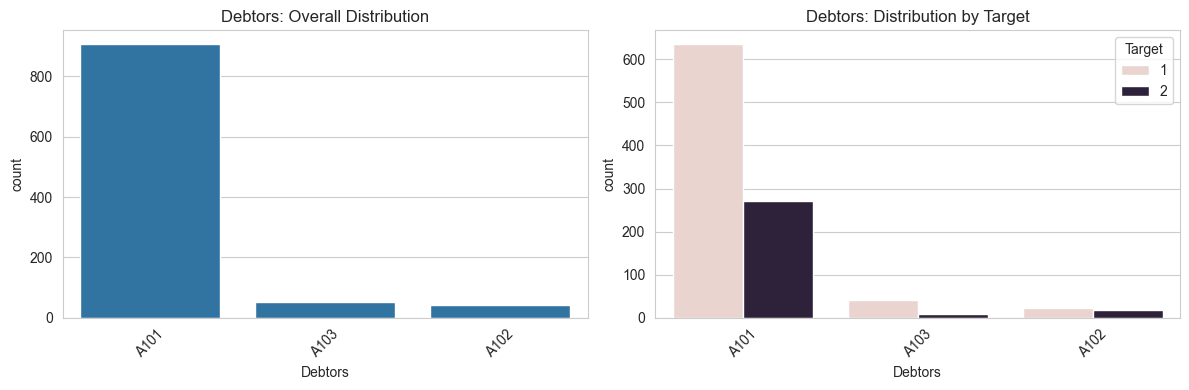

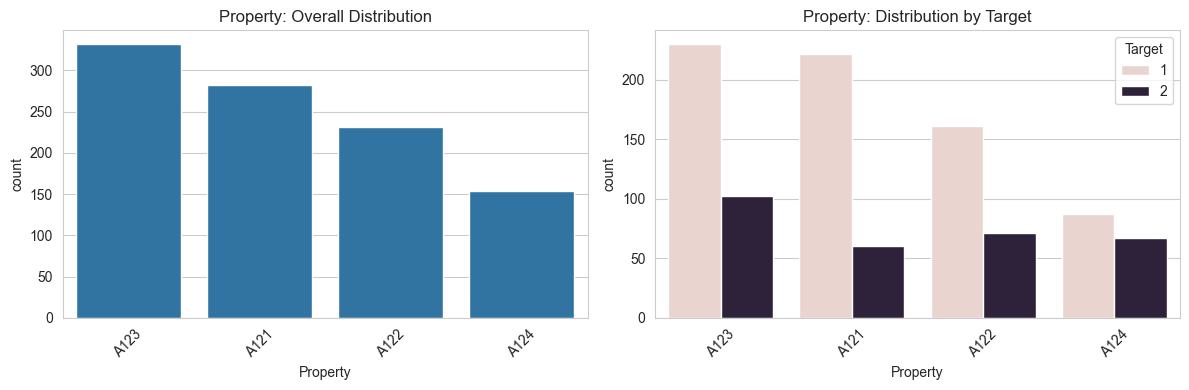

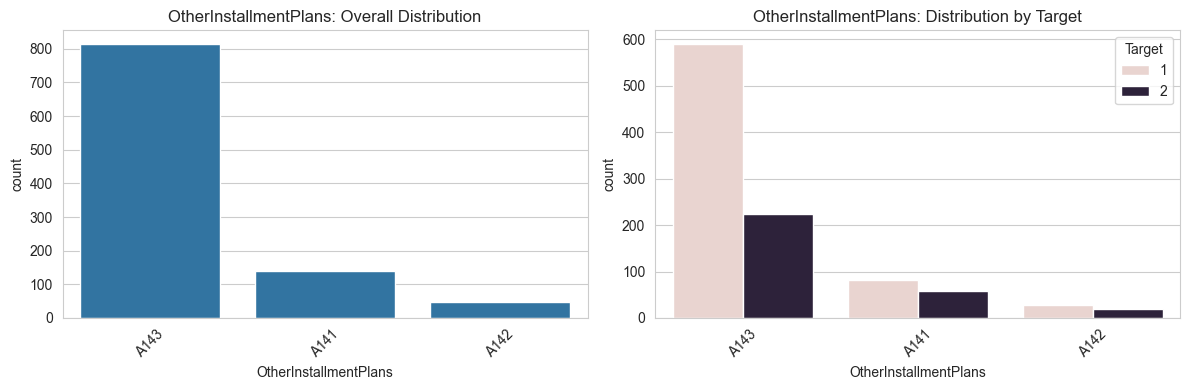

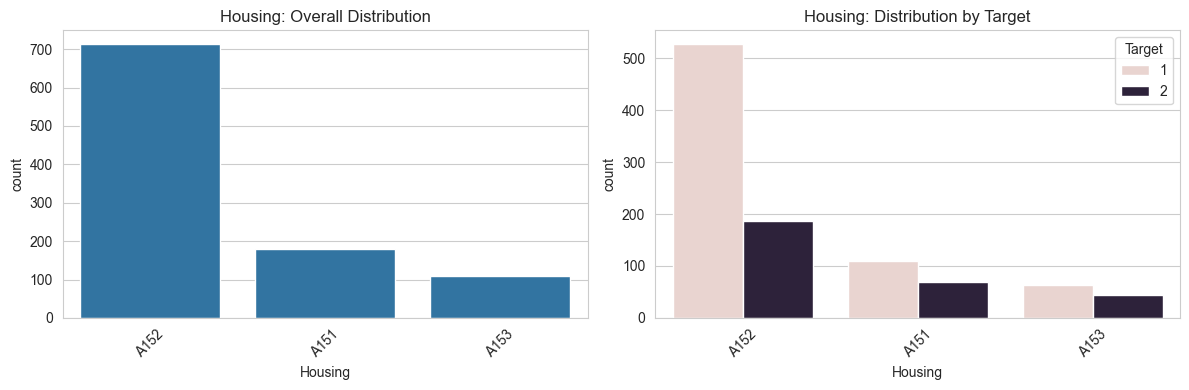

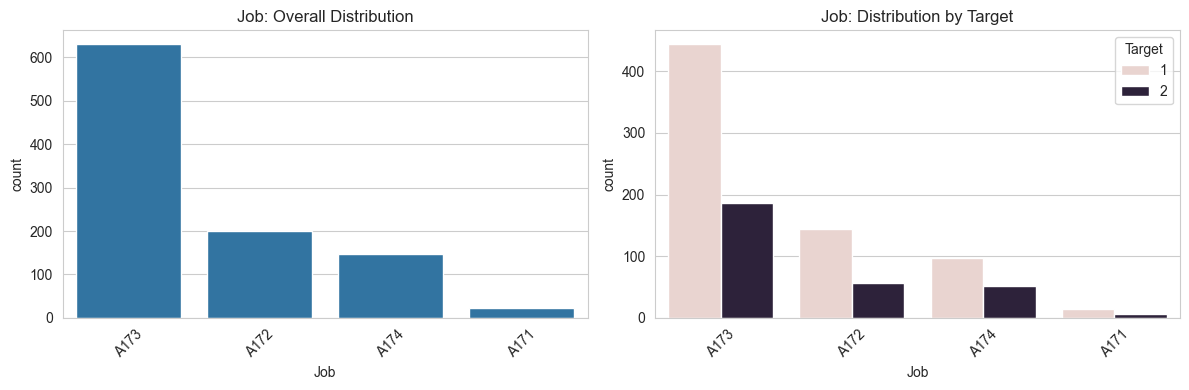

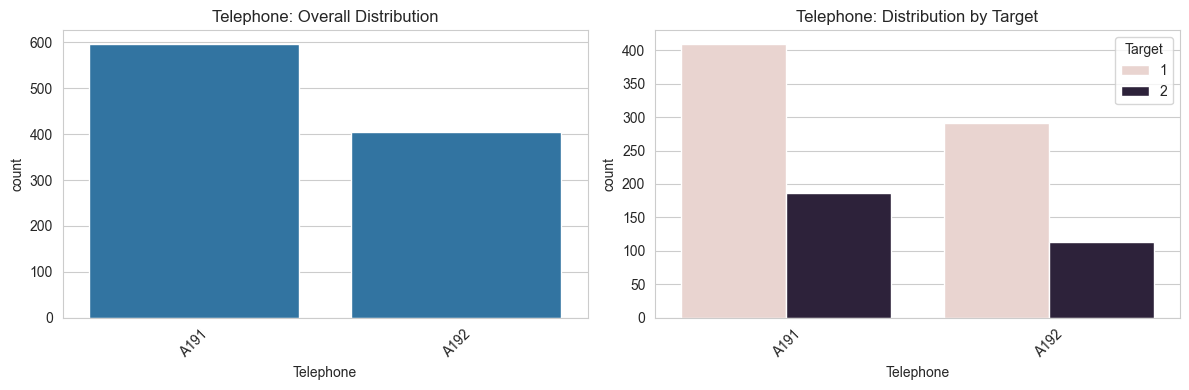

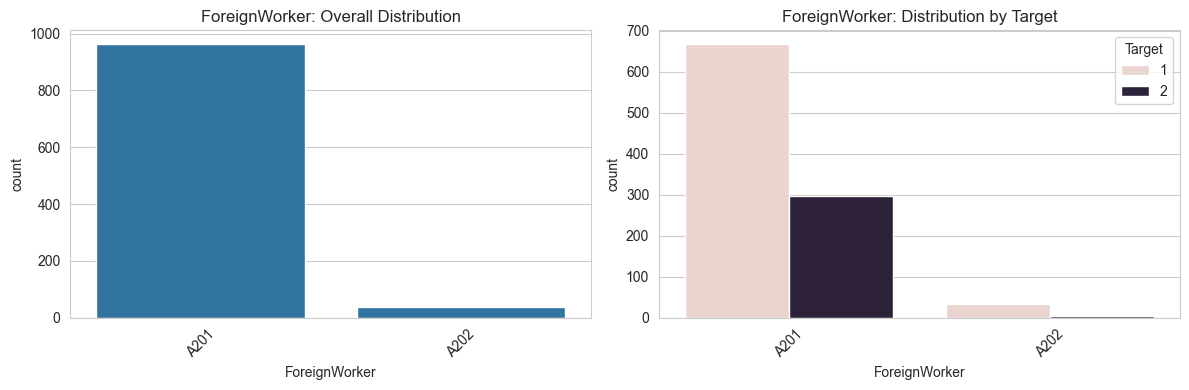

In [14]:
plot_categorical_dual(df)

In [22]:
def plot_numerical_histograms(df, target_col='Target', bins=30):
    
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    numeric_cols = [col for col in numeric_cols if col != target_col]

    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(data=df, x=col, hue=target_col, kde=True, bins=bins, element='step', stat='density', common_norm=False)
        plt.title(f"Distribution of {col} by {target_col}")
        plt.xlabel(col)
        plt.ylabel("Density")
        plt.tight_layout()
        plt.show()

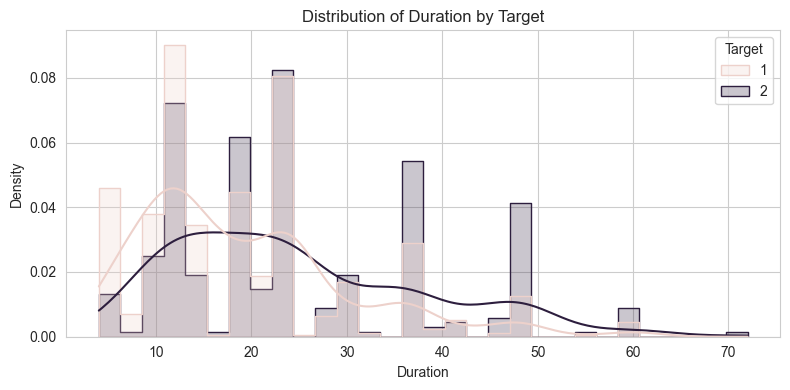

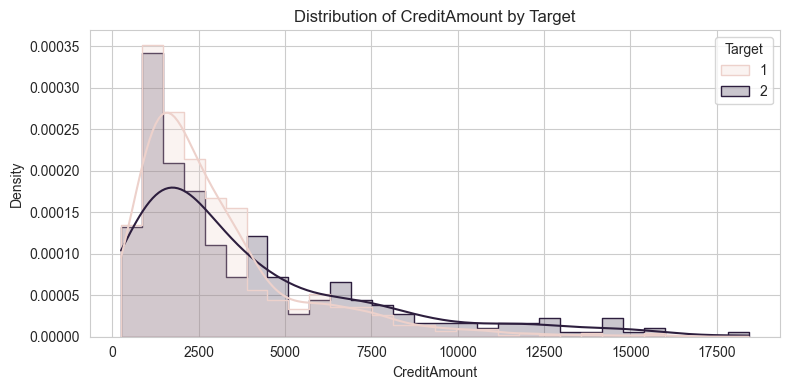

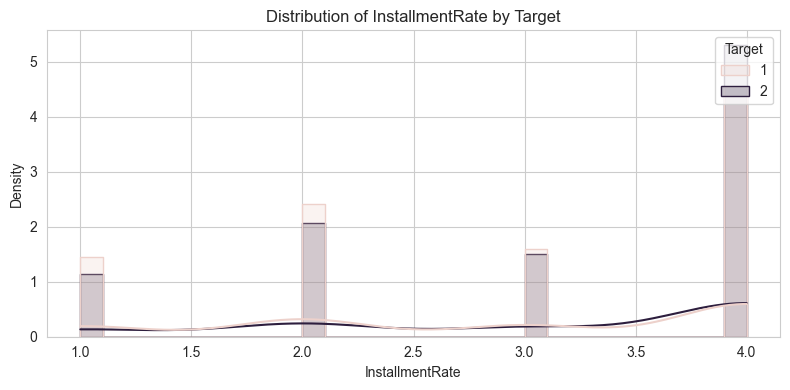

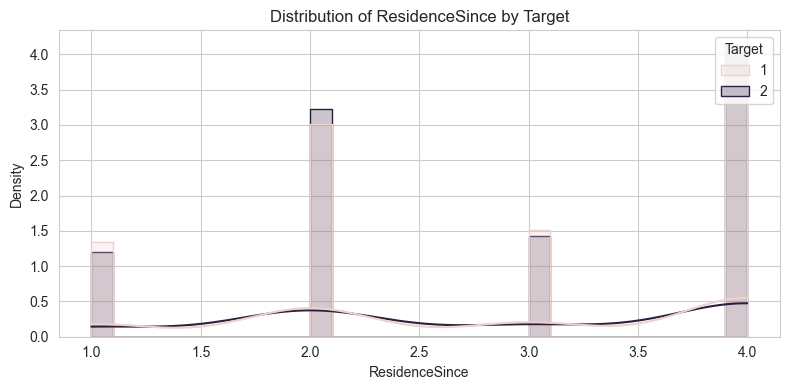

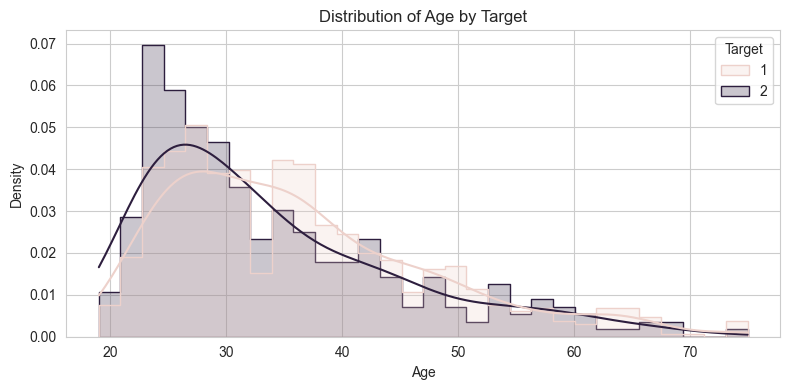

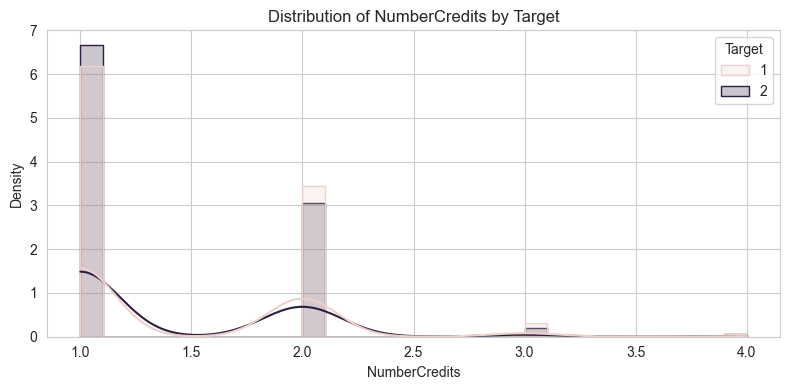

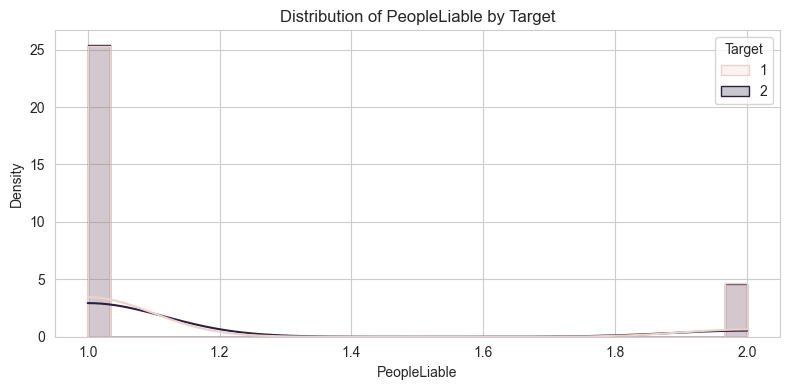

In [23]:
plot_numerical_histograms(df)

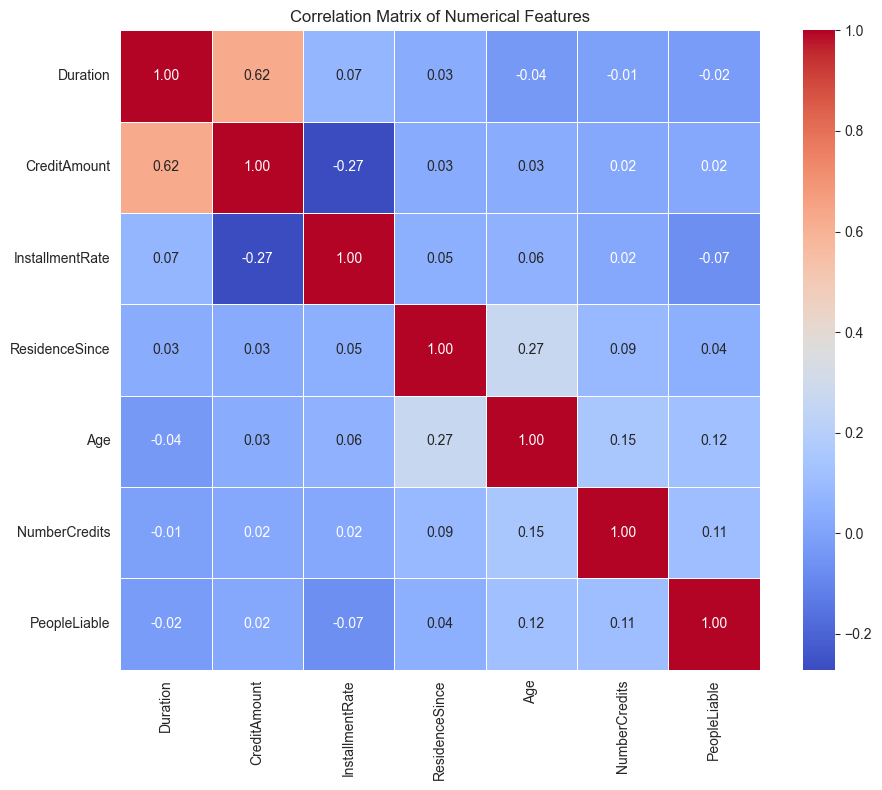

In [24]:
numeric_features = [col for col in numeric_cols if col != 'Target']

# Correlation matrix
corr_matrix = df[numeric_features].corr()

# Visualize with a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

In [25]:
target_corr = df[numeric_features + ['Target']].corr()['Target'].drop('Target')
print(target_corr.sort_values(ascending=False))

Duration           0.214927
CreditAmount       0.154739
InstallmentRate    0.072404
ResidenceSince     0.002967
PeopleLiable      -0.003015
NumberCredits     -0.045732
Age               -0.091127
Name: Target, dtype: float64


In [26]:
cat_cols = ['Status', 'CreditHistory', 'Purpose', 'Savings', 'EmploymentSince', 'PersonalStatusSex', 'Debtors',
            'Property', 'OtherInstallmentPlans', 'Housing', 'Job']
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Convert all dummy columns to int (safe for sklearn)
dummy_cols = [col for col in df.columns if any(c in col for c in cat_cols)]
df[dummy_cols] = df[dummy_cols].astype(int)

In [27]:
df

,Duration,CreditAmount,InstallmentRate,ResidenceSince,Age,NumberCredits,PeopleLiable,Telephone,ForeignWorker,Target,...,Property_A122,Property_A123,Property_A124,OtherInstallmentPlans_A142,OtherInstallmentPlans_A143,Housing_A152,Housing_A153,Job_A172,Job_A173,Job_A174
0,6,1169,4,4,67,2,1,A192,A201,1,...,0,0,0,0,1,1,0,0,1,0
1,48,5951,2,2,22,1,1,A191,A201,2,...,0,0,0,0,1,1,0,0,1,0
2,12,2096,2,3,49,1,2,A191,A201,1,...,0,0,0,0,1,1,0,1,0,0
3,42,7882,2,4,45,1,2,A191,A201,1,...,1,0,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,A191,A201,2,...,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,A191,A201,1,...,0,0,0,0,1,1,0,1,0,0
996,30,3857,4,4,40,1,1,A192,A201,1,...,1,0,0,0,1,1,0,0,0,1
997,12,804,4,4,38,1,1,A191,A201,1,...,0,1,0,0,1,1,0,0,1,0
998,45,1845,4,4,23,1,1,A192,A201,2,...,0,0,1,0,1,0,1,0,1,0


In [28]:
telephone_map = {
    'A191': 0,
    'A192': 1,
}
df['Telephone'] = df['Telephone'].map(telephone_map)

In [29]:
foreign_map ={
    'A201': 1,
    'A202': 0,
}
df['ForeignWorker'] = df['ForeignWorker'].map(foreign_map)

In [30]:
df

,Duration,CreditAmount,InstallmentRate,ResidenceSince,Age,NumberCredits,PeopleLiable,Telephone,ForeignWorker,Target,...,Property_A122,Property_A123,Property_A124,OtherInstallmentPlans_A142,OtherInstallmentPlans_A143,Housing_A152,Housing_A153,Job_A172,Job_A173,Job_A174
0,6,1169,4,4,67,2,1,1,1,1,...,0,0,0,0,1,1,0,0,1,0
1,48,5951,2,2,22,1,1,0,1,2,...,0,0,0,0,1,1,0,0,1,0
2,12,2096,2,3,49,1,2,0,1,1,...,0,0,0,0,1,1,0,1,0,0
3,42,7882,2,4,45,1,2,0,1,1,...,1,0,0,0,1,0,1,0,1,0
4,24,4870,3,4,53,2,2,0,1,2,...,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0,1,1,...,0,0,0,0,1,1,0,1,0,0
996,30,3857,4,4,40,1,1,1,1,1,...,1,0,0,0,1,1,0,0,0,1
997,12,804,4,4,38,1,1,0,1,1,...,0,1,0,0,1,1,0,0,1,0
998,45,1845,4,4,23,1,1,1,1,2,...,0,0,1,0,1,0,1,0,1,0


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [32]:
from sklearn.model_selection import train_test_split

X = df.drop('Target', axis=1)
y = df['Target']  # should be 0 (good) and 1 (bad)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [34]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

Accuracy : 0.78
Precision: 0.8157894736842105
Recall   : 0.8857142857142857
F1 Score : 0.8493150684931506
